In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

Tokenization

In [ ]:
text = "After flying a long distance, a thirsty crow was wandering the forest in search of water. Finally, he saw a pot half-filled with water. He tried to drink from it but his beak wasn’t long enough to reach the water inside. He then saw pebbles on the ground and one by one, he put them in the pot until the water rose to the brim. The crow then hastily drank from it and quenched his thirst."
doc = nlp(text)

for token in doc:
    print(token.text)

After
flying
a
long
distance
,
a
thirsty
crow
was
wandering
the
forest
in
search
of
water
.
Finally
,
he
saw
a
pot
half
-
filled
with
water
.
He
tried
to
drink
from
it
but
his
beak
was
n’t
long
enough
to
reach
the
water
inside
.
He
then
saw
pebbles
on
the
ground
and
one
by
one
,
he
put
them
in
the
pot
until
the
water
rose
to
the
brim
.
The
crow
then
hastily
drank
from
it
and
quenched
his
thirst
.


Lowercasing

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
text = "After flying a long distance, a thirsty crow was wandering the forest in search of water. Finally, he saw a pot half-filled with water. He tried to drink from it but his beak wasn’t long enough to reach the water inside. He then saw pebbles on the ground and one by one, he put them in the pot until the water rose to the brim. The crow then hastily drank from it and quenched his thirst."
doc = nlp(text)
tokens = [token.text.lower() for token in doc if token.text not in punctuation]
print("Lowercasing:")
print(tokens)


Lowercasing:
['after', 'flying', 'a', 'long', 'distance', 'a', 'thirsty', 'crow', 'was', 'wandering', 'the', 'forest', 'in', 'search', 'of', 'water', 'finally', 'he', 'saw', 'a', 'pot', 'half', 'filled', 'with', 'water', 'he', 'tried', 'to', 'drink', 'from', 'it', 'but', 'his', 'beak', 'was', 'n’t', 'long', 'enough', 'to', 'reach', 'the', 'water', 'inside', 'he', 'then', 'saw', 'pebbles', 'on', 'the', 'ground', 'and', 'one', 'by', 'one', 'he', 'put', 'them', 'in', 'the', 'pot', 'until', 'the', 'water', 'rose', 'to', 'the', 'brim', 'the', 'crow', 'then', 'hastily', 'drank', 'from', 'it', 'and', 'quenched', 'his', 'thirst']


Stopword removal

In [ ]:
filtered_tokens = [token for token in tokens if token not in STOP_WORDS]
print(filtered_tokens)

['flying', 'long', 'distance', 'thirsty', 'crow', 'wandering', 'forest', 'search', 'water', 'finally', 'saw', 'pot', 'half', 'filled', 'water', 'tried', 'drink', 'beak', 'long', 'reach', 'water', 'inside', 'saw', 'pebbles', 'ground', 'pot', 'water', 'rose', 'brim', 'crow', 'hastily', 'drank', 'quenched', 'thirst']


lemmetization

In [ ]:
lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(filtered_tokens))]
print(lemmatized_tokens)

['fly', 'long', 'distance', 'thirsty', 'crow', 'wander', 'forest', 'search', 'water', 'finally', 'see', 'pot', 'half', 'fill', 'water', 'try', 'drink', 'beak', 'long', 'reach', 'water', 'inside', 'see', 'pebble', 'ground', 'pot', 'water', 'rise', 'brim', 'crow', 'hastily', 'drank', 'quench', 'thirst']


Sentence segmentation

In [ ]:
sentences = [sent.text for sent in doc.sents]
print("\nSentence Segmentation:")
print(sentences)


Sentence Segmentation:
['After flying a long distance, a thirsty crow was wandering the forest in search of water.', 'Finally, he saw a pot half-filled with water.', 'He tried to drink from it but his beak wasn’t long enough to reach the water inside.', 'He then saw pebbles on the ground and one by one, he put them in the pot until the water rose to the brim.', 'The crow then hastily drank from it and quenched his thirst.']


Paragragh Segmentation

In [ ]:
paragraphs = [p.strip() for p in text.split('\n') if p.strip()]
print("\nParagraph Segmentation:")
for i, paragraph in enumerate(paragraphs, 1):
    print(f"Paragraph {i}: {paragraph}")


Paragraph Segmentation:
Paragraph 1: After flying a long distance, a thirsty crow was wandering the forest in search of water. Finally, he saw a pot half-filled with water. He tried to drink from it but his beak wasn’t long enough to reach the water inside. He then saw pebbles on the ground and one by one, he put them in the pot until the water rose to the brim. The crow then hastily drank from it and quenched his thirst.


KeyWord Extraction

In [ ]:
from collections import Counter

word_freq = Counter(tokens)
keywords = [word for word, freq in word_freq.most_common(10)]
print("\nKeyword Extraction:")
print(keywords)


Keyword Extraction:
['the', 'water', 'he', 'a', 'to', 'long', 'crow', 'was', 'in', 'saw']


Named Entity Recognition (NER)

In [ ]:
text = "Apple Inc. is located in Cupertino, California, and was founded by Steve Jobs."
doc = nlp(text)
named_entities = [(ent.text, ent.label_) for ent in doc.ents]
print("\nNamed Entity Recognition (NER):")
for entity, label in named_entities:
    print(f"Entity: {entity}, Label: {label}")


Named Entity Recognition (NER):
Entity: Apple Inc., Label: ORG
Entity: Cupertino, Label: GPE
Entity: California, Label: GPE
Entity: Steve Jobs, Label: PERSON


Text Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

kmeans = KMeans(n_clusters=2)
kmeans.fit(tfidf_matrix)
cluster_labels = kmeans.labels_

print("\nText Clustering (Example - Cluster Labels):")
for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}, Cluster: {cluster_labels[i]}")


Text Clustering (Example - Cluster Labels):
Sentence: After flying a long distance, a thirsty crow was wandering the forest in search of water., Cluster: 1
Sentence: Finally, he saw a pot half-filled with water., Cluster: 0
Sentence: He tried to drink from it but his beak wasn’t long enough to reach the water inside., Cluster: 1
Sentence: He then saw pebbles on the ground and one by one, he put them in the pot until the water rose to the brim., Cluster: 0
Sentence: The crow then hastily drank from it and quenched his thirst., Cluster: 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(tfidf_matrix)
topics = lda.components_
print("\nTopic Modeling (Example - Topics):")
for i, topic in enumerate(topics):
    print(f"Topic {i}: {topic}")



Topic Modeling (Example - Topics):
Topic 0: [0.50805338 0.66714065 0.50825561 0.69800205 0.50825561 0.69800205
 0.50965452 0.50805338 0.50903429 0.50825561 0.50825561 0.89858176
 0.89858176 0.50805338 0.50805338 0.50984671 0.69800205 0.89858176
 0.50903429 1.0575401  0.50984671 0.66655264 0.50825561 0.50984671
 0.50935658 0.50805338 0.69800205 0.90017093 0.69800205 0.98423232
 0.69800205 0.50903429 0.50825561 0.69800205 0.98423232 0.50805338
 0.96506398 0.69800205 0.66714065 0.50903429 0.50805338 0.6649251
 0.50825561 0.69800205 0.50805338 0.50805338 0.50825561 0.84905118
 0.89858176]
Topic 1: [0.78571444 0.77857131 0.7562739  0.50571782 0.7562739  0.50571782
 1.00870757 0.78571444 0.83969433 0.7562739  0.7562739  0.50738111
 0.50738111 0.78571444 0.78571444 0.98492609 0.50571782 0.50738111
 0.83969433 0.6643636  0.98492609 0.73481729 0.7562739  0.98492609
 0.94107419 0.78571444 0.50571782 0.5072688  0.50571782 0.50765587
 0.50571782 0.83969433 0.7562739  0.50571782 0.50765587 0.78571

Evalution

In [ ]:
from nltk import word_tokenize
from nltk.metrics import precision, recall, f_measure
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def evaluate_segmentation(reference, segmented):
    reference_tokens = word_tokenize(reference)
    segmented_tokens = word_tokenize(segmented)

    prec = precision(set(reference_tokens), set(segmented_tokens))
    rec = recall(set(reference_tokens), set(segmented_tokens))
    f1 = f_measure(set(reference_tokens), set(segmented_tokens))

    return prec, rec, f1


In [ ]:
reference_text = "After flying a long distance, a thirsty crow was wandering the forest in search of water. Finally, he saw a pot half-filled with water. He tried to drink from it but his beak wasn’t long enough to reach the water inside. He then saw pebbles on the ground and one by one, he put them in the pot until the water rose to the brim. The crow then hastily drank from it and quenched his thirst."

segmented_text = "After flying a long distance, a thirsty crow was wandering the forest in search of water.', 'Finally, he saw a pot half-filled with water.', 'He tried to drink from it but his beak wasn’t long enough to reach the water inside.', 'He then saw pebbles on the ground and one by one, he put them in the pot until the water rose to the brim.', 'The crow then hastily drank from it and quenched his thirst."


precision, recall, f1_score = evaluate_segmentation(reference_text, segmented_text)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Precision: 0.93
Recall: 0.95
F1-Score: 0.94


visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
segmented_text = "After flying a long distance, a thirsty crow was wandering the forest in search of water.', 'Finally, he saw a pot half-filled with water.', 'He tried to drink from it but his beak wasn’t long enough to reach the water inside.', 'He then saw pebbles on the ground and one by one, he put them in the pot until the water rose to the brim.', 'The crow then hastily drank from it and quenched his thirst."
segments = segmented_text.split()

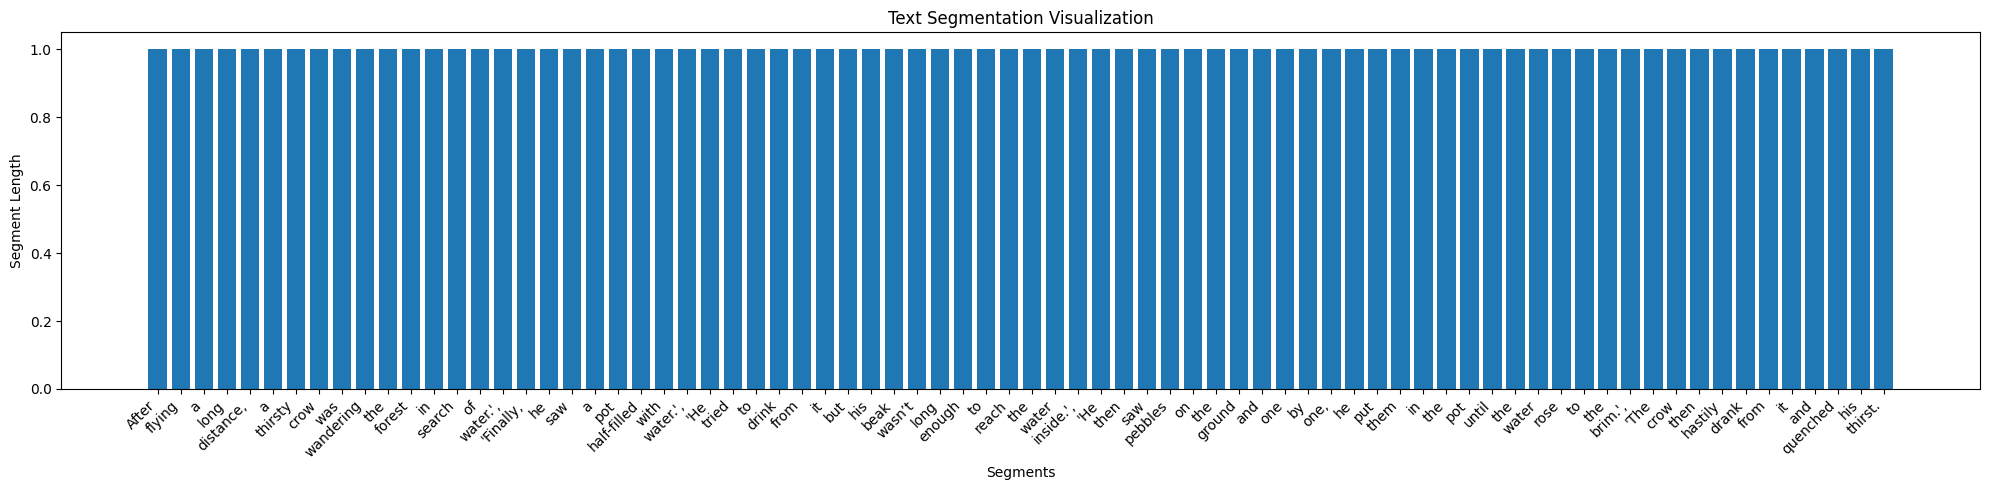

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(range(len(segments)), [1] * len(segments), tick_label=segments)
plt.title("Text Segmentation Visualization")
plt.xlabel("Segments")
plt.ylabel("Segment Length")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()